# Instance Segmentation with Detectron2

## Imports

In [1]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import os
import cv2
import glob
import random
import numpy as np
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

# from pycocotools import mask
# from skimage import measure
# from PIL import Image

## Register Dataset

In [2]:
from detectron2.data.datasets import register_coco_instances
data_path = '/home/svdesai/research/datasets/CVPPP2017_LSC_training/'
# register_coco_instances("my_dataset_train", {}, os.path.join(data_path, 'annotations/train.json'), os.path.join(data_path, 'train'))
# register_coco_instances("my_dataset_val", {}, os.path.join(data_path, 'annotations/test.json'), os.path.join(data_path, 'test'))
register_coco_instances("my_dataset_train", {}, 'train.json', os.path.join(data_path, 'train'))
register_coco_instances("my_dataset_val", {}, 'test.json', os.path.join(data_path, 'test'))

## Config for training

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

cfg.TEST.EVAL_PERIOD = 500
# cfg.INPUT.MASK_FORMAT = 'bitmask'

## Training

In [4]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[10/13 01:46:42 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (80,) in the checkpoint but (1,) in the model!


[10/13 01:46:42 d2.engine.train_loop]: Starting training from iteration 0
[10/13 01:46:51 d2.utils.events]:  eta: 0:10:46  iter: 19  total_loss: 2.064  loss_cls: 0.788  loss_box_reg: 0.526  loss_mask: 0.693  loss_rpn_cls: 0.012  loss_rpn_loc: 0.008  time: 0.4385  data_time: 0.0274  lr: 0.000020  max_mem: 3396M
[10/13 01:47:00 d2.utils.events]:  eta: 0:10:29  iter: 39  total_loss: 1.715  loss_cls: 0.498  loss_box_reg: 0.499  loss_mask: 0.682  loss_rpn_cls: 0.014  loss_rpn_loc: 0.007  time: 0.4290  data_time: 0.0053  lr: 0.000040  max_mem: 3487M
[10/13 01:47:08 d2.utils.events]:  eta: 0:10:14  iter: 59  total_loss: 1.507  loss_cls: 0.313  loss_box_reg: 0.521  loss_mask: 0.657  loss_rpn_cls: 0.010  loss_rpn_loc: 0.007  time: 0.4224  data_time: 0.0049  lr: 0.000060  max_mem: 3487M
[10/13 01:47:16 d2.utils.events]:  eta: 0:10:00  iter: 79  total_loss: 1.464  loss_cls: 0.279  loss_box_reg: 0.570  loss_mask: 0.612  loss_rpn_cls: 0.006  loss_rpn_loc: 0.006  time: 0.4200  data_time: 0.0047  lr:

## Testing on a single image

In [4]:
import matplotlib.pyplot as plt

In [5]:
# load the model

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, 'leaf_seg_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55
predictor = DefaultPredictor(cfg)

In [17]:
rand_img = random.choice(glob.glob("/home/svdesai/research/datasets/CVPPP2017_LSC_training/test/*.png"))
im = cv2.imread(rand_img)
outputs = predictor(im)
mask_img = outputs['instances'].to("cpu").pred_masks.permute(1,2,0)

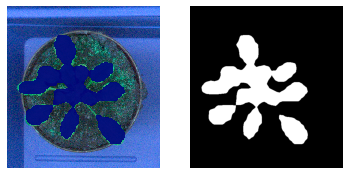

In [18]:
fig = plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
masked = np.ma.masked_where(mask_img == 0, mask_img)
plt.imshow(np.asarray(im), 'gray', interpolation='none')
plt.imshow(masked, 'jet', interpolation='none', alpha=0.9)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(mask_img, cmap='gray')
plt.axis('off')
plt.show()